**1. Construcción de la red neuronal convolucional**

In [ ]:
# importación de librerias
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import keras.utils
from keras import utils as np_utils
import matplotlib.pyplot as plt

In [ ]:
# Inicializar la red
rnc = Sequential()

In [ ]:
# Convolución
rnc.add(Conv2D(filters = 32, kernel_size = (3, 3), 
                      input_shape = (32, 32, 3), activation = "relu"))

In [ ]:
# Capa de entrada
rnc.add(Flatten())

In [ ]:
# Capas ocultas
rnc.add(Dense(units = 128, activation = "relu"))
rnc.add(Dense(units = 64, activation = "relu"))

In [ ]:
# Capa de salida
rnc.add(Dense(units = 10, activation = "softmax"))

In [ ]:
# Compilación de la red
rnc.compile(optimizer = "SGD", loss = "categorical_crossentropy", metrics = ["accuracy"])

**2. Entrenamiento de la red**

In [ ]:
# Preprocesamiento de datos (imagenes)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

datagen = ImageDataGenerator(rescale = 1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# Entrenamiento
datagen.fit(x_train)

rnc.fit(datagen.flow(x_train, y_train, batch_size = 16,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size = 16, subset='validation'),
         steps_per_epoch = len(x_train)/500, epochs=100)

Epoch 1/100
100/100 [==============================] - 15s 142ms/step - loss: 2.1763 - accuracy: 0.1950 - val_loss: 2.0979 - val_accuracy: 0.2208
Epoch 2/100
100/100 [==============================] - 14s 141ms/step - loss: 2.0458 - accuracy: 0.2631 - val_loss: 2.0001 - val_accuracy: 0.2684
Epoch 3/100
100/100 [==============================] - 13s 129ms/step - loss: 1.9818 - accuracy: 0.2788 - val_loss: 1.9355 - val_accuracy: 0.3008
Epoch 4/100
100/100 [==============================] - 13s 129ms/step - loss: 1.9834 - accuracy: 0.2769 - val_loss: 1.9093 - val_accuracy: 0.3117
Epoch 5/100
100/100 [==============================] - 13s 129ms/step - loss: 1.8919 - accuracy: 0.3225 - val_loss: 1.8717 - val_accuracy: 0.3275
Epoch 6/100
100/100 [==============================] - 13s 128ms/step - loss: 1.8609 - accuracy: 0.3400 - val_loss: 1.8510 - val_accuracy: 0.3377
Epoch 7/100
100/100 [==============================] - 14s 141ms/step - loss: 1.8502 - accuracy: 0.3275 - val_loss: 1.8522 -

**3. Evaluación del modelo**

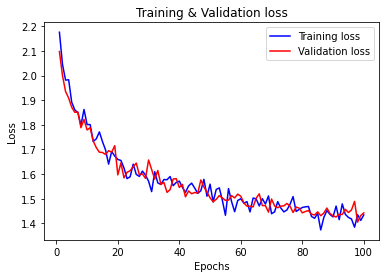

In [ ]:
# grafica
loss = rnc.history.history['loss']
val_loss = rnc.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
